In [13]:
from ned import Net_moduls
import networkx as nx
import numpy as np

In [14]:
from nxviz.plots import CircosPlot

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Tehran Index DF and Tehran DF Normed Return 90 Far - 00 Far

In [16]:
tehran_index = pd.read_excel('../Data/Tehran_Indexes_Price_NoRegime.xlsx').set_index('date')

In [17]:
tehran_df_reg = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')

In [18]:
tehran_index_99 = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed_newox.xlsx').set_index('date')

## Tehran DF Normed Return 90 Far - 98 Dey

In [19]:
tehran_df = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df = tehran_df[tehran_df.columns[:-12]].iloc[:-300]

## Tehran DF Normed Return 90 Far - 00 Far

In [20]:
tehran_df_completeDates = pd.read_excel('../Data/Tehran_Indexes_NormedReturned_Regimed.xlsx').set_index('date')
tehran_df_completeDates = tehran_df_completeDates[tehran_df_completeDates.columns[:-12]]

## Tehran pn 3 Regimed DF Normed Return 90 Far - 98 Dey 

In [28]:
tehran_df

,index,Brent Oil,Coin,Euro,USD,CPI,HOUSE,M1,M2,GDP,...,SarmayeGozari,Bank,SayerMali,HamlVaNaghl,Bimeh,Amlakva,Rayaneh,FaniVaMohandesi,Mali,KanehayeFelezi
date,,,,,,,,,,,,,,,,,,,,,
2011-04-03,1.589072,1.204538,-0.064675,0.003352,0.074195,0.254184,-0.085913,0.576417,0.006245,0.286194,...,2.194589,0.133014,0.547866,-0.048002,0.505688,-0.499292,1.954840,1.634032,0.064607,2.018185
2011-04-04,1.722792,0.470067,-0.064675,0.036768,0.167699,0.243951,-0.089951,0.541727,-0.009378,0.281783,...,1.815667,0.198958,-0.136209,0.043659,-0.455753,0.011184,2.114437,1.645781,0.055551,2.142481
2011-04-05,1.019672,0.042583,0.468823,0.601798,0.166652,0.233752,-0.093977,0.507283,-0.024954,0.277406,...,0.457524,0.506716,-0.662157,0.141696,-0.570506,0.633553,-0.466937,1.052189,0.063312,1.447213
2011-04-06,1.014590,0.230965,0.462817,0.593530,-0.067326,2.006083,0.406780,1.861363,1.285347,1.036355,...,0.030868,0.260946,-1.065222,1.847740,-0.425568,0.496462,-1.418319,0.646751,0.023379,1.856502
2011-04-09,-0.905655,0.229965,0.167873,0.099266,-0.020655,0.193289,-0.109981,0.371734,-0.086809,0.260217,...,-1.970588,-0.068563,-1.601476,0.582609,-0.154509,-0.217193,-1.027851,0.062932,-0.056198,-0.213372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-08,0.717635,-0.067610,0.739780,1.370259,2.351736,-0.214940,0.081682,-0.174252,-0.215326,-0.166132,...,0.790869,-0.142976,0.258805,-0.161283,2.045285,1.939491,-0.800293,-1.891069,0.033783,-0.087172
2019-12-09,0.819724,0.175839,-1.052052,1.022600,1.063754,-0.232334,0.063182,-0.178024,-0.216039,-0.164481,...,-0.417577,0.904300,-0.560313,-0.286975,1.365052,-0.627182,-0.851995,-1.147900,0.100005,0.520053
2019-12-10,-0.161552,-0.394303,-0.762229,-2.808084,-2.968095,-0.249700,0.044761,-0.181792,-0.216751,-0.162829,...,-0.443126,-1.129695,-0.200885,-0.249685,1.243553,-0.162087,0.152954,1.576587,-0.111301,-0.254579


In [21]:
tehran_df_ThreeReg_pn_1_98 = tehran_df[tehran_df_reg['3_PN']==1]
tehran_df_ThreeReg_pn_2_98 = tehran_df[tehran_df_reg['3_PN']==2]
tehran_df_ThreeReg_pn_3_98 = tehran_df[tehran_df_reg['3_PN']==3]

/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_2140/1219616497.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_pn_1_98 = tehran_df[tehran_df_reg['3_PN']==1]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_2140/1219616497.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_pn_2_98 = tehran_df[tehran_df_reg['3_PN']==2]
/var/folders/mj/xw3m0dws3yq8j2md9n8j3g940000gn/T/ipykernel_2140/1219616497.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tehran_df_ThreeReg_pn_3_98 = tehran_df[tehran_df_reg['3_PN']==3]


IndexError: indices are out-of-bounds

## Tehran pn 3 Regimed DF Normed Return 90 Far - 98 Dey / Same Length

In [18]:
max_length_ThreeReg_pn_90_98 = min(len(tehran_df_ThreeReg_pn_1_98), len(tehran_df_ThreeReg_pn_2_98),len(tehran_df_ThreeReg_pn_3_98))
tehran_df_ThreeReg_pn_1_same_length_98 = tehran_df_ThreeReg_pn_1_98[-max_length_ThreeReg_pn_90_98:]
tehran_df_ThreeReg_pn_2_same_length_98 = tehran_df_ThreeReg_pn_2_98[-max_length_ThreeReg_pn_90_98:]
tehran_df_ThreeReg_pn_3_same_length_98 = tehran_df_ThreeReg_pn_3_98[-max_length_ThreeReg_pn_90_98:]

# 35) Tehran 3 pn Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey

In [141]:
nm = Net_moduls()

In [142]:
thr35_1 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_1_same_length_98)
thr35_2 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_2_same_length_98)
thr35_3 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_3_same_length_98)

thr35 = min(thr35_1, thr35_2, thr35_3)

In [143]:
nm = Net_moduls()
pearson_network_ThreeReg_pn_1_98 = nm.construct_network(tehran_df_ThreeReg_pn_1_same_length_98, method='pearson', threshold=thr35)

In [144]:
nm.get_network_features(pearson_network_ThreeReg_pn_1_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.572727,567,0.779198,0.572727,0.010594,0.71286,1.455556


<Figure size 1600x1200 with 0 Axes>

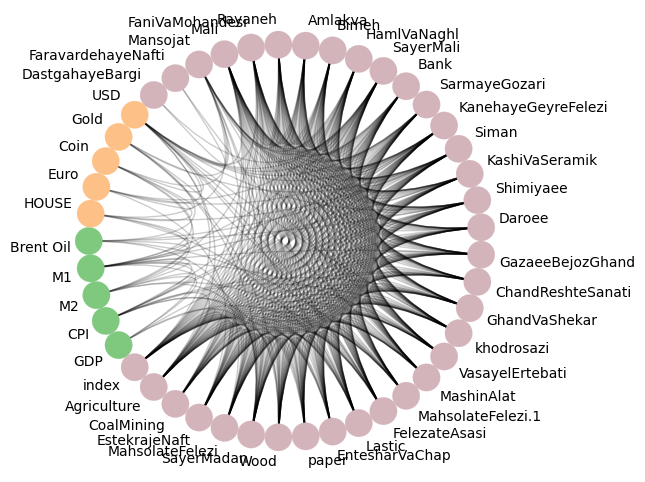

In [145]:
circos = nm.plot_circos_network(pearson_network_ThreeReg_pn_1_98)
circos.draw()

In [146]:
pearson_network_ThreeReg_pn_2_98 = nm.construct_network(tehran_df_ThreeReg_pn_2_same_length_98, method='pearson', threshold=thr35)

In [147]:
nm.get_network_features(pearson_network_ThreeReg_pn_2_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.51401,532,0.731662,0.51401,0.011638,0.680649,1.512077


<Figure size 1600x1200 with 0 Axes>

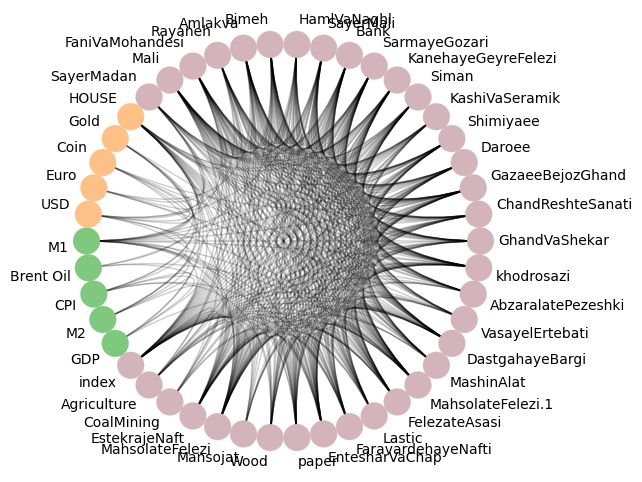

In [148]:
circos = nm.plot_circos_network(pearson_network_ThreeReg_pn_2_98)
circos.draw()

In [149]:
pearson_network_ThreeReg_pn_3_98 = nm.construct_network(tehran_df_ThreeReg_pn_3_same_length_98, method='pearson', threshold=thr35)

In [150]:
nm.get_network_features(pearson_network_ThreeReg_pn_3_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.516162,511,0.751714,0.516162,0.011839,0.6832,1.509091


<Figure size 1600x1200 with 0 Axes>

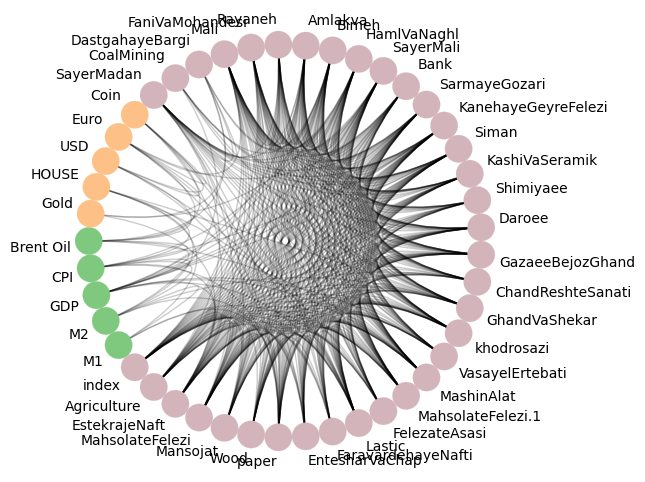

In [151]:
circos = nm.plot_circos_network(pearson_network_ThreeReg_pn_3_98)
circos.draw()

# 36) Tehran 3 pn Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far

In [27]:
# thr21_1 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_1_same_length_98)
# thr21_2 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_2_same_length_98)
# thr21_3 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_3_same_length_98)

# thr21 = min(thr8_1, thr8_2)

In [28]:
# nm = Net_moduls()
# pearson_network_TwoReg_pn_1 = nm.construct_network(tehran_df_TwoReg_pn_1_same_length, method='pearson', threshold=thr8)

In [29]:
# nm.get_network_features(pearson_network_TwoReg_pn_1)

In [30]:
# circos = nm.plot_circos_network(pearson_network_TwoReg_pn_1)
# circos.draw()

In [31]:
# pearson_network_TwoReg_pn_2 = nm.construct_network(tehran_df_TwoReg_pn_2_same_length, method='pearson', threshold=thr8)

In [32]:
# nm.get_network_features(pearson_network_TwoReg_pn_2)

In [33]:
# circos = nm.plot_circos_network(pearson_network_TwoReg_pn_2)
# circos.draw()

# 37) Tehran 3 pn Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [152]:
thr37_1 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_1_same_length_98[-100:])
thr37_2 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_2_same_length_98[-100:])
thr37_3 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_3_same_length_98[-100:])

thr37 = min(thr37_1, thr37_2, thr37_3)

In [153]:
pearson_network_ThreeReg_pn_1_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_1_same_length_98[-100:], method='pearson', threshold=thr37)

In [154]:
nm.get_network_features(pearson_network_ThreeReg_pn_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.564646,559,0.793225,0.564646,0.011205,0.703676,1.481818


In [155]:
pearson_network_ThreeReg_pn_2_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_2_same_length_98[-100:], method='pearson', threshold=thr37)

In [156]:
nm.get_network_features(pearson_network_ThreeReg_pn_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.520773,539,0.712897,0.520773,0.011331,0.684648,1.498551


In [157]:
pearson_network_ThreeReg_pn_3_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_3_same_length_98[-100:], method='pearson', threshold=thr37)

In [158]:
nm.get_network_features(pearson_network_ThreeReg_pn_3_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.520202,515,0.757863,0.520202,0.011651,0.686599,1.50101


# 38) Tehran 3 pn Regime Pearson (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [159]:
nm = Net_moduls()
pearson_network_ThreeReg_pn_1_98_averged = nm.get_network_features_averaged_median(tehran_df, regimes_column = tehran_df_reg['3_PN'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.22394959428101735


In [160]:
pearson_network_ThreeReg_pn_1_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,3.000000,5.818182,0.541197,502.000000,0.844385,0.541197,0.013559,0.603599,1.701759
STDs,0.000000,0.394771,0.045438,29.234450,0.038556,0.045438,0.004692,0.047151,0.053271
Means,2.854167,4.541667,0.315494,310.000000,0.644059,0.315494,0.021910,0.535493,1.952132
STDs,0.356674,0.682870,0.027988,23.795043,0.053216,0.027988,0.001943,0.013526,0.050942
Means,2.875000,4.791667,0.402681,368.540000,0.745708,0.402681,0.017728,0.551508,1.823481
STDs,0.337832,0.414851,0.033904,26.006443,0.023259,0.033904,0.002951,0.037131,0.096658


# 39) Tehran 3 pn Regime Pearson (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [161]:
nm = Net_moduls()
pearson_network_ThreeReg_pn_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, regimes_column= tehran_df_reg['3_PN'],method='pearson',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.17339386544727745


In [162]:
pearson_network_ThreeReg_pn_90_00_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,3.660000,0.492792,510.040000,0.729150,0.492792,0.012921,0.662185,1.568541
STDs,0.0,0.478518,0.011535,11.938550,0.022114,0.011535,0.000466,0.007662,0.020523
Means,2.0,3.120000,0.412771,426.260000,0.662578,0.412771,0.014839,0.622370,1.652466
STDs,0.0,0.328261,0.041904,40.761531,0.034356,0.041904,0.001185,0.020878,0.053470
Means,2.0,3.240000,0.486485,481.620000,0.740855,0.486485,0.013325,0.659572,1.572970
STDs,0.0,0.431419,0.018524,18.339085,0.022973,0.018524,0.000963,0.015833,0.041422


# 40) Tehran 3 pn Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey

In [163]:
nm = Net_moduls()

In [164]:
thr40_1 = nm.find_median_entropy_threshold(tehran_df_ThreeReg_pn_1_same_length_98)
thr40_2 = nm.find_median_entropy_threshold(tehran_df_ThreeReg_pn_2_same_length_98)
thr40_3 = nm.find_median_entropy_threshold(tehran_df_ThreeReg_pn_3_same_length_98)

thr40 = min(thr40_1, thr40_2, thr40_3)

In [165]:
entropy_network_ThreeReg_pn_1_98 = nm.construct_network(tehran_df_ThreeReg_pn_1_same_length_98, method='entropy', threshold=thr40)

In [166]:
nm.get_network_features(entropy_network_ThreeReg_pn_1_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.765657,758,0.804474,0.765657,0.00545,0.817964,1.234343


<Figure size 1600x1200 with 0 Axes>

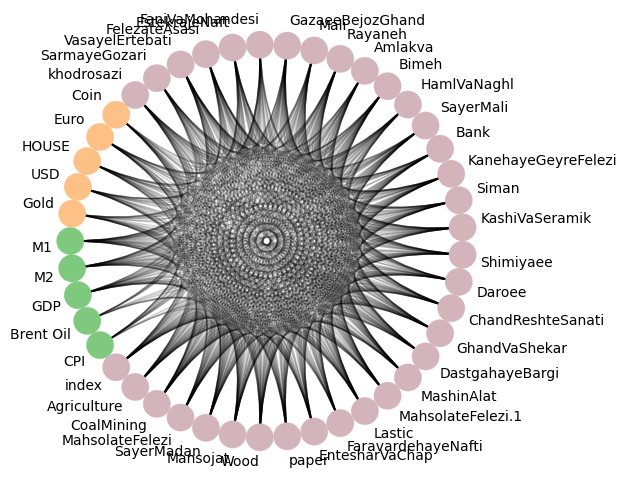

In [167]:
circos = nm.plot_circos_network(entropy_network_ThreeReg_pn_1_98)
circos.draw()

In [168]:
entropy_network_ThreeReg_pn_2_98 = nm.construct_network(tehran_df_ThreeReg_pn_2_same_length_98, method='entropy', threshold=thr40)

In [169]:
nm.get_network_features(entropy_network_ThreeReg_pn_2_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.743961,770,0.781319,0.743961,0.005819,0.8038,1.256039


<Figure size 1600x1200 with 0 Axes>

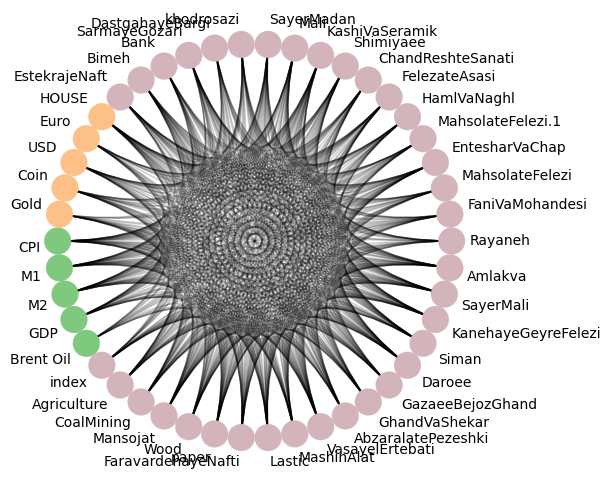

In [170]:
circos = nm.plot_circos_network(entropy_network_ThreeReg_pn_2_98)
circos.draw()

In [171]:
entropy_network_ThreeReg_pn_3_98 = nm.construct_network(tehran_df_ThreeReg_pn_3_same_length_98, method='entropy', threshold=thr40)

In [172]:
nm.get_network_features(entropy_network_ThreeReg_pn_3_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.70101,694,0.739794,0.70101,0.006953,0.777631,1.29899


<Figure size 1600x1200 with 0 Axes>

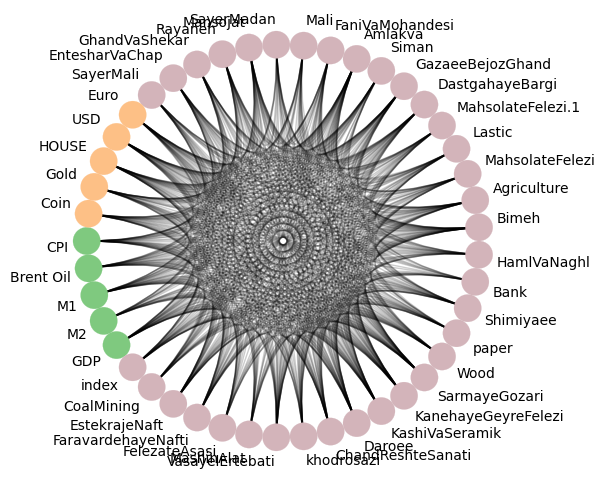

In [173]:
circos = nm.plot_circos_network(entropy_network_ThreeReg_pn_3_98)
circos.draw()

# 41) Tehran 3 pn Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far

In [27]:
# thr21_1 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_1_same_length_98)
# thr21_2 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_2_same_length_98)
# thr21_3 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_3_same_length_98)

# thr21 = min(thr8_1, thr8_2)

In [28]:
# nm = Net_moduls()
# pearson_network_TwoReg_pn_1 = nm.construct_network(tehran_df_TwoReg_pn_1_same_length, method='pearson', threshold=thr8)

In [29]:
# nm.get_network_features(pearson_network_TwoReg_pn_1)

In [30]:
# circos = nm.plot_circos_network(pearson_network_TwoReg_pn_1)
# circos.draw()

In [31]:
# pearson_network_TwoReg_pn_2 = nm.construct_network(tehran_df_TwoReg_pn_2_same_length, method='pearson', threshold=thr8)

In [32]:
# nm.get_network_features(pearson_network_TwoReg_pn_2)

In [33]:
# circos = nm.plot_circos_network(pearson_network_TwoReg_pn_2)
# circos.draw()

# 42) Tehran 3 pn Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [174]:
thr42_1 = nm.find_median_entropy_threshold(tehran_df_ThreeReg_pn_1_same_length_98[-100:])
thr42_2 = nm.find_median_entropy_threshold(tehran_df_ThreeReg_pn_2_same_length_98[-100:])
thr42_3 = nm.find_median_entropy_threshold(tehran_df_ThreeReg_pn_3_same_length_98[-100:])

thr42 = min(thr42_1, thr42_2, thr42_3)

In [175]:
entropy_network_ThreeReg_pn_1_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_1_same_length_98[-100:], method='entropy', threshold=thr42)

In [176]:
nm.get_network_features(entropy_network_ThreeReg_pn_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.791919,784,0.84152,0.791919,0.004839,0.838197,1.208081


In [177]:
entropy_network_ThreeReg_pn_2_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_2_same_length_98[-100:], method='entropy', threshold=thr42)

In [178]:
nm.get_network_features(entropy_network_ThreeReg_pn_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.754589,781,0.779114,0.754589,0.005578,0.809266,1.245411


In [179]:
entropy_network_ThreeReg_pn_3_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_3_same_length_98[-100:], method='entropy', threshold=thr42)

In [180]:
nm.get_network_features(entropy_network_ThreeReg_pn_3_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.706061,699,0.727238,0.706061,0.006836,0.778369,1.293939


# 43) Tehran 3 pn Regime Entropy (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [181]:
nm = Net_moduls()
entropy_network_ThreeReg_pn_1_98_averged = nm.get_network_features_averaged_median(tehran_df, regimes_column = tehran_df_reg['3_PN'],method='entropy',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.02948700115025787


In [183]:
entropy_network_ThreeReg_pn_1_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,2.000000,0.631758,625.440000,0.688952,0.631758,0.008564,0.739141,1.368242
STDs,0.0,0.000000,0.033563,33.227208,0.038586,0.033563,0.000781,0.019578,0.033563
Means,2.0,2.040000,0.592174,612.900000,0.651358,0.592174,0.009272,0.717592,1.407961
STDs,0.0,0.197949,0.065360,67.647420,0.047389,0.065360,0.001488,0.033564,0.065491
Means,2.0,2.000000,0.582970,577.140000,0.653265,0.582970,0.009698,0.713846,1.417030
STDs,0.0,0.000000,0.034630,34.283339,0.026646,0.034630,0.000805,0.016935,0.034630


# 44) Tehran 3 pn Regime Entropy (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [43]:
nm = Net_moduls()
entropy_network_ThreeReg_pn_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, regimes_column= tehran_df_reg['3_PN'],method='entropy',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 49


/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:416: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or spe

fixed_thr= 0.12410079927876998


/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or spe

In [184]:
entropy_network_ThreeReg_pn_90_00_averged

NameError: name 'entropy_network_ThreeReg_pn_90_00_averged' is not defined

# 45) Tehran 3 pn Regime Crossed (Based on Median Threshold) Period of 90 Far - 98 Dey

In [103]:
nm = Net_moduls()

In [194]:
thr45_1 = nm.find_median_crossed_100_threshold(tehran_df_ThreeReg_pn_1_same_length_98)
thr45_2 = nm.find_median_crossed_100_threshold(tehran_df_ThreeReg_pn_2_same_length_98)
thr45_3 = nm.find_median_crossed_100_threshold(tehran_df_ThreeReg_pn_3_same_length_98)

thr45 = min(thr45_1, thr45_2, thr45_3)

In [196]:
crossed_network_ThreeReg_pn_1_98 = nm.construct_network(tehran_df_ThreeReg_pn_1_same_length_98, method='crossed_100', threshold=thr45)

In [197]:
nm.get_network_features(crossed_network_ThreeReg_pn_1_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,2,0.274396,284,0.440188,0.274396,0.016491,0.58922,1.725604


<Figure size 1600x1200 with 0 Axes>

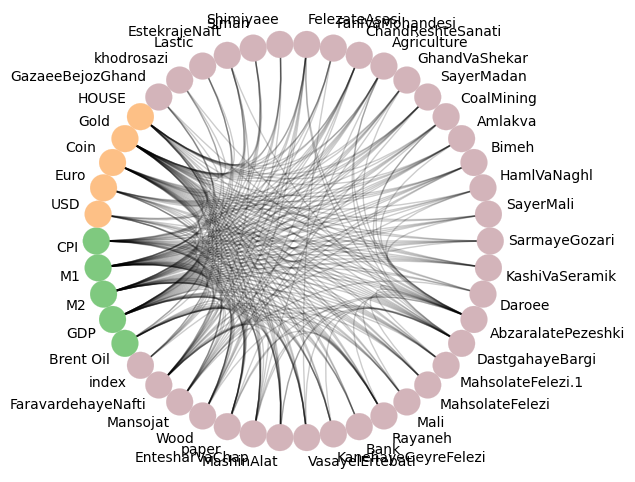

In [198]:
circos = nm.plot_circos_network(crossed_network_ThreeReg_pn_1_98)
circos.draw()

In [199]:
crossed_network_ThreeReg_pn_2_98 = nm.construct_network(tehran_df_ThreeReg_pn_2_same_length_98, method='crossed_100', threshold=thr45)

In [200]:
nm.get_network_features(crossed_network_ThreeReg_pn_2_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.36715,380,0.428634,0.36715,0.014427,0.617081,1.634783


<Figure size 1600x1200 with 0 Axes>

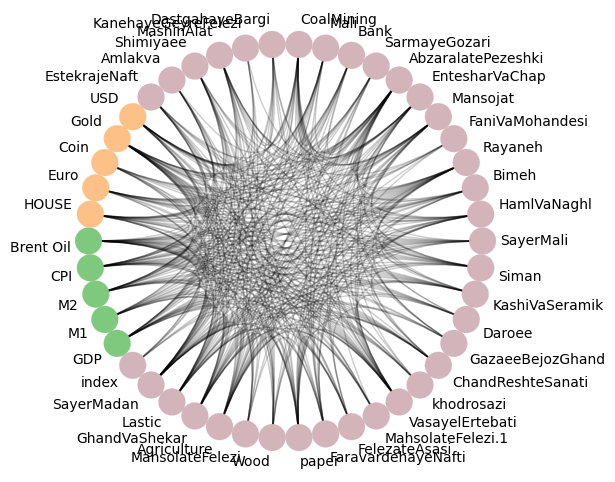

In [204]:
circos = nm.plot_circos_network(crossed_network_ThreeReg_pn_2_98)
circos.draw()

In [201]:
crossed_network_ThreeReg_pn_3_98 = nm.construct_network(tehran_df_ThreeReg_pn_3_same_length_98, method='crossed_100', threshold=thr45)

In [202]:
nm.get_network_features(crossed_network_ThreeReg_pn_3_98)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.360386,373,0.495744,0.360386,0.014559,0.617053,1.64058


<Figure size 1600x1200 with 0 Axes>

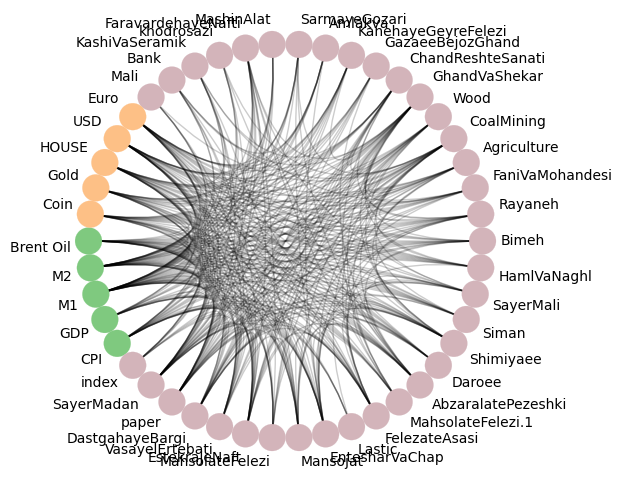

In [203]:
circos = nm.plot_circos_network(crossed_network_ThreeReg_pn_3_98)
circos.draw()

# 46) Tehran 3 pn Regime Crossed (Based on Median Threshold) Period of 90 Far - 00 Far

In [27]:
# thr21_1 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_1_same_length_98)
# thr21_2 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_2_same_length_98)
# thr21_3 = nm.find_median_pearson_threshold(tehran_df_ThreeReg_pn_3_same_length_98)

# thr21 = min(thr8_1, thr8_2)

In [28]:
# nm = Net_moduls()
# pearson_network_TwoReg_pn_1 = nm.construct_network(tehran_df_TwoReg_pn_1_same_length, method='pearson', threshold=thr8)

In [29]:
# nm.get_network_features(pearson_network_TwoReg_pn_1)

In [30]:
# circos = nm.plot_circos_network(pearson_network_TwoReg_pn_1)
# circos.draw()

In [31]:
# pearson_network_TwoReg_pn_2 = nm.construct_network(tehran_df_TwoReg_pn_2_same_length, method='pearson', threshold=thr8)

In [32]:
# nm.get_network_features(pearson_network_TwoReg_pn_2)

In [33]:
# circos = nm.plot_circos_network(pearson_network_TwoReg_pn_2)
# circos.draw()

# 47) Tehran 3 pn Regime Crossed (Based on Median Threshold) Period of 90 Far - 98 Dey/ Last 100 Records

In [205]:
thr47_1 = nm.find_median_crossed_100_threshold(tehran_df_ThreeReg_pn_1_same_length_98[-100:])
thr47_2 = nm.find_median_crossed_100_threshold(tehran_df_ThreeReg_pn_2_same_length_98[-100:])
thr47_3 = nm.find_median_crossed_100_threshold(tehran_df_ThreeReg_pn_3_same_length_98[-100:])

thr47 = min(thr47_1, thr47_2, thr47_3)

In [206]:
crossed_network_ThreeReg_pn_1_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_1_same_length_98[-100:], method='crossed_100', threshold=thr47)

In [207]:
nm.get_network_features(crossed_network_ThreeReg_pn_1_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.283092,293,0.436489,0.283092,0.016425,0.588575,1.722705


In [208]:
crossed_network_ThreeReg_pn_2_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_2_same_length_98[-100:], method='crossed_100', threshold=thr47)

In [209]:
nm.get_network_features(crossed_network_ThreeReg_pn_2_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.377778,391,0.452958,0.377778,0.014185,0.620629,1.624155


In [210]:
crossed_network_ThreeReg_pn_3_98_last100 = nm.construct_network(tehran_df_ThreeReg_pn_3_same_length_98[-100:], method='crossed_100', threshold=thr47)

In [211]:
nm.get_network_features(crossed_network_ThreeReg_pn_3_98_last100)

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
0,2,3,0.350725,363,0.470256,0.350725,0.0148,0.613841,1.651208


# 48) Tehran 3 pn Regime Crossed (Based on Median Threshold) Period of 90 Far - 98 Dey/ 50 windows of 100 Records

In [212]:
nm = Net_moduls()
crossed_network_ThreeReg_pn_1_98_averged = nm.get_network_features_averaged_median(tehran_df, regimes_column = tehran_df_reg['3_PN'],method='crossed_100',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 46
fixed_thr= 0.6


In [213]:
crossed_network_ThreeReg_pn_1_98_averged

,radius,diameter,densities,number_of_edges,average_clustering,avg_degree_centrality,avg_betweenness_centrality,avg_closeness_centrality,average_shortest_path_length
Means,2.0,3.200000,0.230185,237.880000,0.448069,0.230185,0.018895,0.554541,1.830568
STDs,0.0,0.404061,0.021822,23.136366,0.048969,0.021822,0.001251,0.015584,0.054004
Means,2.0,2.660000,0.371130,384.120000,0.381000,0.371130,0.014332,0.616886,1.630609
STDs,0.0,0.478518,0.014027,14.517604,0.018574,0.014027,0.000337,0.005573,0.014809
Means,2.0,2.980000,0.306473,317.200000,0.382731,0.306473,0.015989,0.592597,1.703536
STDs,0.0,0.141421,0.029230,30.252677,0.036493,0.029230,0.000860,0.013181,0.037826


# 49) Tehran 3 pn Regime Crossed (Based on Median Threshold) Period of 90 Far - 00 Far/ 50 windows of 100 Records

In [43]:
nm = Net_moduls()
crossed_network_ThreeReg_pn_90_00_averged = nm.get_network_features_averaged_median(tehran_df_completeDates, regimes_column= tehran_df_reg['3_PN'],method='crossed_100',edges_threshold=200, target_window=100, target_length=50)

Number of columns data in our DataFrame is = 49


/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:416: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or spe

fixed_thr= 0.12410079927876998


/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method ='pearson')
/Users/hossein4527/MEGA/MEGAsync/Commit/Neda_PhD/neda_sep2023/Time_Series_Trend_Forcasting/Codes/ned.py:502: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or spe

In [ ]:
crossed_network_ThreeReg_pn_90_00_averged